___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

In [3]:
import os

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [4]:
start = datetime.datetime(2006,1,1)
end = datetime.datetime(2016,1,1)

In [28]:
 f = data.DataReader("AAPL", "av-daily", start, end, 
                    api_key='2WLIWINZMGISR1QG')

In [29]:
f

,open,high,low,close,volume
2006-01-03,72.332,74.75,72.2500,74.75,28829800
2006-01-04,75.130,75.98,74.5000,74.97,22128700
2006-01-05,74.830,74.90,73.7500,74.38,16050800
2006-01-06,75.240,76.70,74.5500,76.30,25159200
2006-01-09,76.730,77.20,75.7400,76.05,24108600
...,...,...,...,...,...
2015-12-24,109.000,109.00,107.9500,108.03,13596680
2015-12-28,107.590,107.69,106.1807,106.82,26704210
2015-12-29,106.960,109.43,106.8600,108.74,30931243
2015-12-30,108.580,108.70,107.1800,107.32,25213777


In [5]:
BAC= data.DataReader("BAC", "av-daily", start, end, api_key='2WLIWINZMGISR1QG')
C = data.DataReader("C", "av-daily", start, end, api_key='2WLIWINZMGISR1QG')
GS = data.DataReader("GS", "av-daily", start, end, api_key='2WLIWINZMGISR1QG')
JPM = data.DataReader("JPM", "av-daily", start, end, api_key='2WLIWINZMGISR1QG')
MS = data.DataReader("MS", "av-daily", start, end, api_key='2WLIWINZMGISR1QG')
WFC = data.DataReader("WFC", "av-daily", start, end, api_key='2WLIWINZMGISR1QG')

In [38]:
WFC

,open,high,low,close,volume
2006-01-03,63.20,63.9500,62.390,63.80,5508200
2006-01-04,63.60,63.6400,62.730,63.06,5435000
2006-01-05,63.00,63.1100,62.620,62.99,5079000
2006-01-06,63.16,63.5500,62.770,63.36,4201900
2006-01-09,63.35,63.6500,63.110,63.35,2809800
...,...,...,...,...,...
2015-12-24,54.97,55.0900,54.710,54.82,4999417
2015-12-28,54.55,54.7800,54.170,54.68,8288759
2015-12-29,55.11,55.3500,54.990,55.29,7894876
2015-12-30,55.27,55.3100,54.794,54.89,8016893


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [6]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [7]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)

In [8]:
bank_stocks

BAC                                     C                       \
             open   high    low  close    volume   open   high    low  close   
2006-01-03  46.92  47.18  46.15  47.08  16296700  49.00  49.38  48.11  49.29   
2006-01-04  47.00  47.24  46.45  46.58  17757900  48.86  49.10  48.35  48.38   
2006-01-05  46.58  46.83  46.32  46.64  14970700  48.44  48.78  48.40  48.62   
2006-01-06  46.80  46.91  46.35  46.57  12599800  48.88  48.90  48.20  48.62   
2006-01-09  46.72  46.97  46.36  46.60  15619400  48.60  48.74  48.30  48.39   
...           ...    ...    ...    ...       ...    ...    ...    ...    ...   
2015-12-24  17.32  17.38  17.22  17.27  29373415  52.48  52.97  52.45  52.71   
2015-12-28  17.22  17.23  16.98  17.13  41759993  52.57  52.57  51.96  52.38   
2015-12-29  17.25  17.35  17.16  17.28  45628449  52.76  53.22  52.74  52.98   
2015-12-30  17.20  17.24  17.04  17.05  35035518  52.84  52.94  52.25  52.30   
2015-12-31  17.01  17.07  16.83  16.83  47106760  52.07  52.39  51.75  51.75   

                      ...     MS                                      WFC  \
              volume  ...   open     high      low  close   volume   open   
2006-01-03  15376000  ...  57.17  58.4900  56.7400  58.31  5377000  63.20   
2006-01-04  18709000  ...  58.70  59.2800  58.3500  58.35  7977800  63.60   
2006-01-05  11431000  ...  58.55  58.5900  58.0200  58.51  5778000  63.00   
2006-01-06  13702000  ...  58.77  58.8500  58.0500  58.57  6889800  63.16   
2006-01-09  16807000  ...  58.63  59.2900  58.6244  59.19  4144500  63.35   
...              ...  ...    ...      ...      ...    ...      ...    ...   
2015-12-24   4671254  ...  32.57  32.7100  32.4400  32.48  2798163  54.97   
2015-12-28   8760444  ...  32.36  32.3600  31.9500  32.17  5420280  54.55   
2015-12-29  10153534  ...  32.44  32.7016  32.3250  32.55  6388244  55.11   
2015-12-30   8763137  ...  32.50  32.6450  32.2000  32.23  5057162  55.27   
2015-12-31  11274831  ...  31.91  32.3000  31.7700  31.81  8149307  54.51   

                                              
               high     low  close    volume  
2006-01-03  63.9500  62.390  63.80   5508200  
2006-01-04  63.6400  62.730  63.06   5435000  
2006-01-05  63.1100  62.620  62.99   5079000  
2006-01-06  63.5500  62.770  63.36   4201900  
2006-01-09  63.6500  63.110  63.35   2809800  
...             ...     ...    ...       ...  
2015-12-24  55.0900  54.710  54.82   4999417  
2015-12-28  54.7800  54.170  54.68   8288759  
2015-12-29  55.3500  54.990  55.29   7894876  
2015-12-30  55.3100  54.794  54.89   8016893  
2015-12-31  54.9499  54.220  54.36  10929420  

[2517 rows x 30 columns]

** Set the column name levels (this is filled out for you):**

In [9]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

** Check the head of the bank_stocks dataframe.**

In [10]:
bank_stocks.head()

Bank Ticker    BAC                                     C                       \
Stock Info    open   high    low  close    volume   open   high    low  close   
2006-01-03   46.92  47.18  46.15  47.08  16296700  49.00  49.38  48.11  49.29   
2006-01-04   47.00  47.24  46.45  46.58  17757900  48.86  49.10  48.35  48.38   
2006-01-05   46.58  46.83  46.32  46.64  14970700  48.44  48.78  48.40  48.62   
2006-01-06   46.80  46.91  46.35  46.57  12599800  48.88  48.90  48.20  48.62   
2006-01-09   46.72  46.97  46.36  46.60  15619400  48.60  48.74  48.30  48.39   

Bank Ticker            ...     MS                                    WFC  \
Stock Info     volume  ...   open   high      low  close   volume   open   
2006-01-03   15376000  ...  57.17  58.49  56.7400  58.31  5377000  63.20   
2006-01-04   18709000  ...  58.70  59.28  58.3500  58.35  7977800  63.60   
2006-01-05   11431000  ...  58.55  58.59  58.0200  58.51  5778000  63.00   
2006-01-06   13702000  ...  58.77  58.85  58.0500  58.57  6889800  63.16   
2006-01-09   16807000  ...  58.63  59.29  58.6244  59.19  4144500  63.35   

Bank Ticker                                
Stock Info    high    low  close   volume  
2006-01-03   63.95  62.39  63.80  5508200  
2006-01-04   63.64  62.73  63.06  5435000  
2006-01-05   63.11  62.62  62.99  5079000  
2006-01-06   63.55  62.77  63.36  4201900  
2006-01-09   63.65  63.11  63.35  2809800  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [11]:
for tick in tickers:
    print(tick  ,  bank_stocks[tick]['close'].max())

BAC 54.9
C 60.34
GS 247.92
JPM 70.08
MS 89.3
WFC 73.0


In [12]:
bank_stocks.xs(key='close',axis=1,level='Stock Info').max()

Bank Ticker
BAC     54.90
C       60.34
GS     247.92
JPM     70.08
MS      89.30
WFC     73.00
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [13]:
newreturns = pd.DataFrame()

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [14]:
for tick in tickers:
    newreturns[tick+ ' Returns']=bank_stocks[tick]['close'].pct_change()

In [15]:
newreturns

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156
2015-12-30,-0.013310,-0.012835,-0.008282,-0.007157,-0.009831,-0.007235


In [16]:
newreturns.head()

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

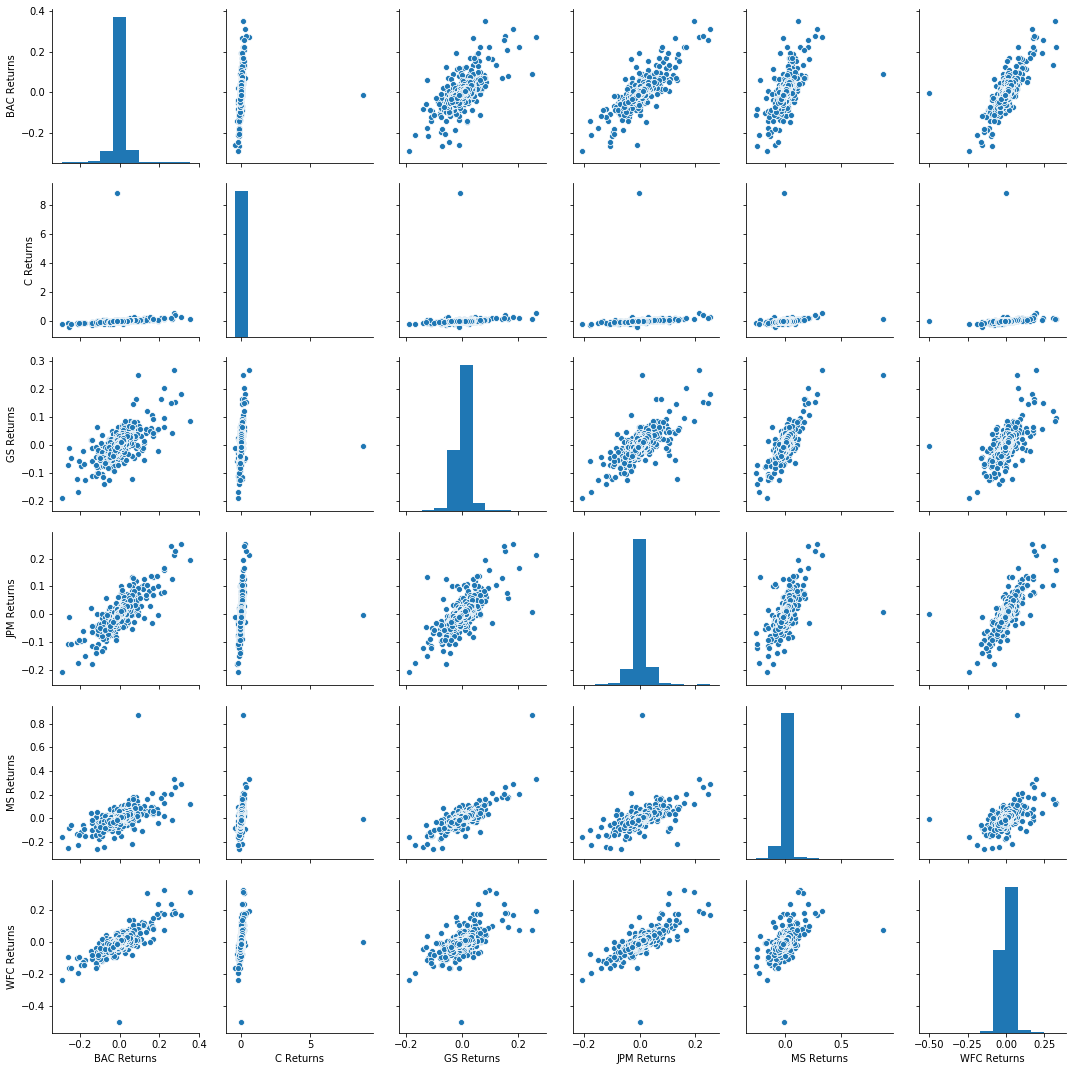

In [17]:
import seaborn as sns
sns.pairplot(newreturns[1:])

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [18]:
newreturns.idxmin()

BAC Returns    2009-01-20
C Returns      2009-02-27
GS Returns     2009-01-20
JPM Returns    2009-01-20
MS Returns     2008-10-09
WFC Returns    2006-08-14
dtype: object

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

In [19]:
newreturns.idxmax()

BAC Returns    2009-04-09
C Returns      2011-05-09
GS Returns     2008-11-24
JPM Returns    2009-01-21
MS Returns     2008-10-13
WFC Returns    2008-07-16
dtype: object

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [20]:
newreturns.std()

BAC Returns    0.036617
C Returns      0.179065
GS Returns     0.025357
JPM Returns    0.027651
MS Returns     0.037831
WFC Returns    0.031841
dtype: float64

In [21]:
newreturns.loc['2015-01-01':'2015-12-31'].std()

BAC Returns    0.016163
C Returns      0.015289
GS Returns     0.014046
JPM Returns    0.014017
MS Returns     0.016249
WFC Returns    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

In [22]:
newreturns

,BAC Returns,C Returns,GS Returns,JPM Returns,MS Returns,WFC Returns
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156
2015-12-30,-0.013310,-0.012835,-0.008282,-0.007157,-0.009831,-0.007235


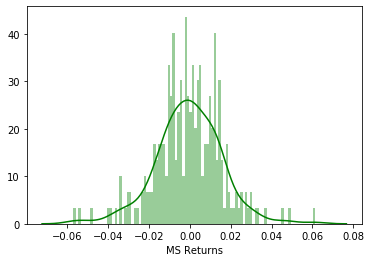

In [23]:
sns.distplot(newreturns['MS Returns'].loc['2015-01-01':'2015-12-31'],bins=100,color='green')

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



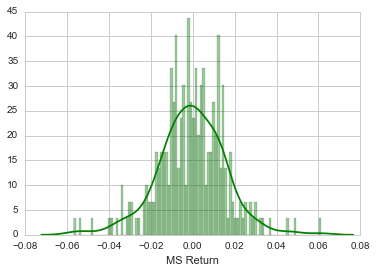

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

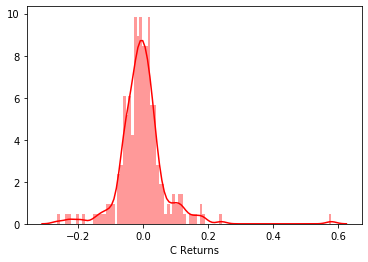

In [24]:
sns.distplot(newreturns['C Returns'].loc['2008-01-01':'2008-12-31'],bins=100,color='red')

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

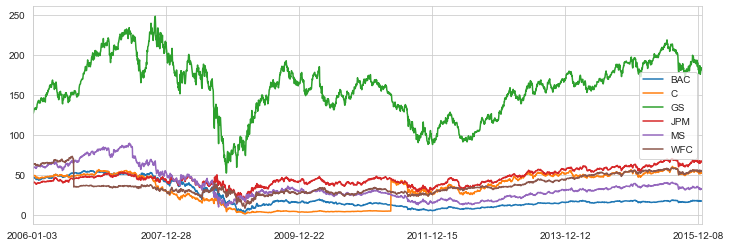

In [26]:
for tick in tickers:
    bank_stocks[tick]['close'].plot(label=tick,figsize=(12,4))
plt.legend()    

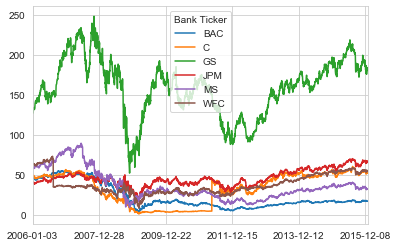

In [27]:
bank_stocks.xs(key='close',axis=1,level='Stock Info').plot()

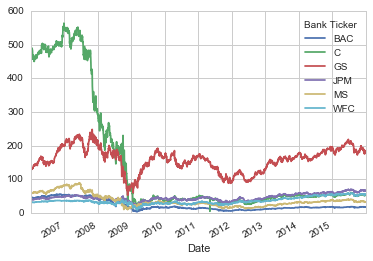

In [28]:
bank_stocks.xs(key='close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

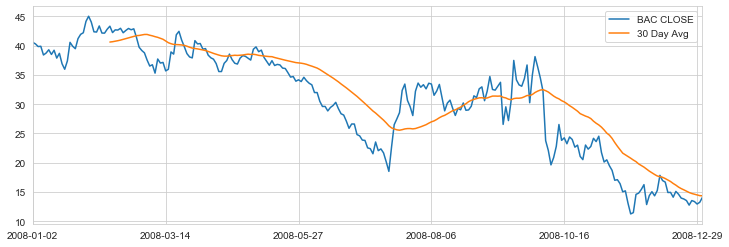

In [29]:
BAC['close'].loc['2008-01-01':'2008-12-31'].plot(label='BAC CLOSE',figsize=(12,4))
BAC['close'].loc['2008-01-01':'2008-12-31'].rolling(window=30).mean().plot(label='30 Day Avg')
plt.legend()

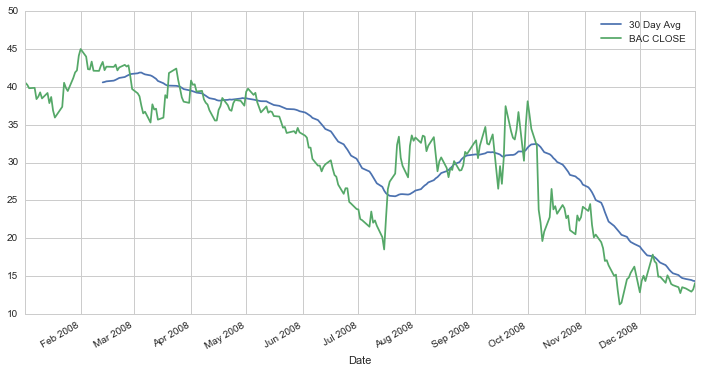

** Create a heatmap of the correlation between the stocks Close Price.**

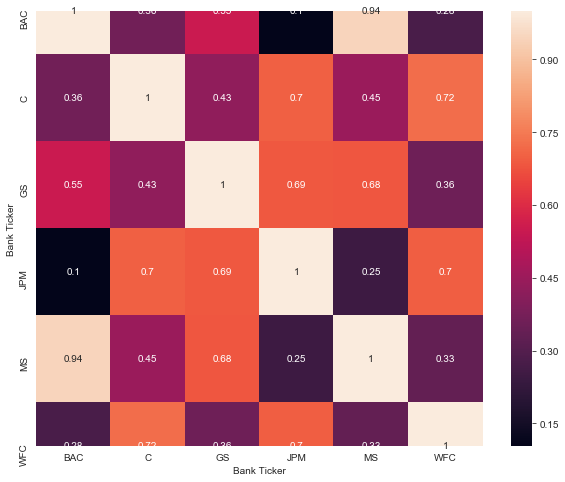

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(bank_stocks.xs(key='close',axis=1,level='Stock Info').corr(),annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

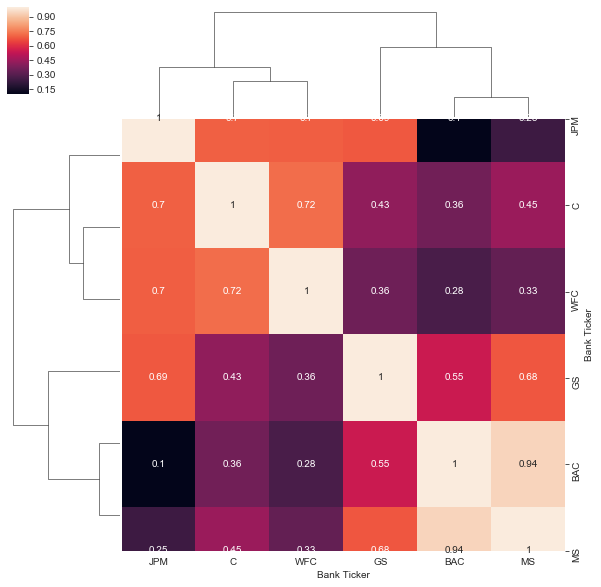

In [126]:
sns.clustermap(bank_stocks.xs(key='close',axis=1,level='Stock Info').corr(),annot=True)

In [34]:
close_corr=bank_stocks.xs(key='close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [37]:
BAC[['open', 'high', 'low', 'close']].loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

In [38]:
MS['close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [40]:
BAC['close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.